### Importing the libraries  :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Loading the dataset :

In [2]:
path = ('D:/Chrome download/train.csv/hotel_review.csv')

In [3]:
df = pd.read_csv(path)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id36401,1
Description,38932,38932,"The room was very nice, free wifi, they allow ...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [6]:
df.drop(['User_ID', 'Browser_Used','Device_Used'], axis=1, inplace=True)

### Data Preprocessing :

In [7]:
count = df.isnull().sum().sort_values(ascending=True)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=True)
missing_data = pd.DataFrame(list(zip(count, percentage)), columns=['Count', 'Percentage_%'])

print('Count and percentage of missing values for the column : \n', missing_data)

Count and percentage of missing values for the column : 
    Count  Percentage_%
0      0           0.0
1      0           0.0


In [8]:
response = df['Is_Response'].value_counts().to_frame().reset_index()

In [9]:
response.rename(columns={'index':'Sentiment'}, inplace=True)
response

,Sentiment,Is_Response
0,happy,26521
1,not happy,12411


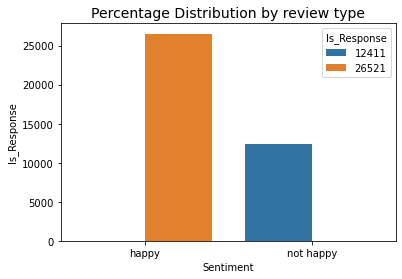

In [10]:
plt.title('Percentage Distribution by review type', size=14);
sns.barplot(x=response['Sentiment'], y=response['Is_Response'], hue=response['Is_Response'], data=response);

#### Apply first level cleaning :

In [11]:
import re
import string

In [12]:
text = df['Description']

In [13]:
text.head()

0    The room was kind of clean but had a VERY stro...
1    I stayed at the Crown Plaza April -- - April -...
2    I booked this hotel through Hotwire at the low...
3    Stayed here with husband and sons on the way t...
4    My girlfriends and I stayed here to celebrate ...
Name: Description, dtype: object

In [14]:
text = text.str.replace("-",'').str.replace('*','').str.replace('%','').str.replace('-','').str.replace("",'').str.replace('.','').str.replace(',','')

<ipython-input-14-6de44b8a28c6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  text = text.str.replace("-",'').str.replace('*','').str.replace('%','').str.replace('-','').str.replace("",'').str.replace('.','').str.replace(',','')


In [15]:
text = text.str.lower()

In [16]:
text = text.str.strip()

In [17]:
text.to_frame()

,Description
0,the room was kind of clean but had a very stro...
1,i stayed at the crown plaza april april th...
2,i booked this hotel through hotwire at the low...
3,stayed here with husband and sons on the way t...
4,my girlfriends and i stayed here to celebrate ...
...,...
38927,we arrived late at night and walked in to a ch...
38928,the only positive impression is location and p...
38929,traveling with friends for shopping and a show...
38930,the experience was just ok we paid extra for a...


### Model Training :

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = text
y = df['Is_Response']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=0)

In [21]:
X_train.head()

35707    this hotel has a wonderful staff with a basic ...
30508    this is a small but comfortable hotel right of...
29973    we booked the w for the first  nights of our h...
649      we stayed at hotel  for  nights checkin was ea...
15379    i found both the front desk staff and concierg...
Name: Description, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [23]:
tv = TfidfVectorizer()

In [24]:
clf = LogisticRegression(solver='lbfgs')

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
model = Pipeline([('Vectorizer',tv),('Classifier',clf)])

In [27]:
model.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

In [28]:
accuracy = model.score(X_test, y_test)
print('Accuracy of the model is :\n',accuracy)

Accuracy of the model is :
 0.8826399589111453


In [29]:
y_pred = model.predict(X_test)

In [30]:
pred_comp = pd.DataFrame(list(zip(y_pred, y_test)), columns=['Predicted','Actual'])
pred_comp.head(5)

,Predicted,Actual
0,happy,happy
1,not happy,happy
2,happy,happy
3,happy,happy
4,happy,happy


### Checking the accuracy of our model :

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
cnf = confusion_matrix(y_pred, y_test)

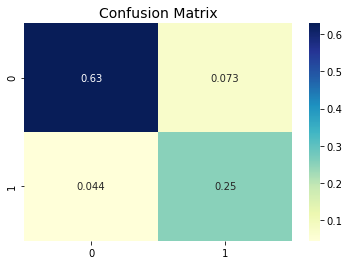

In [33]:
plt.title('Confusion Matrix', size=14);
sns.heatmap(cnf/np.sum(cnf), annot=True, cmap='YlGnBu');

In [34]:
clf_report = classification_report(y_pred, y_test)
print(clf_report)

              precision    recall  f1-score   support

       happy       0.93      0.90      0.91      2738
   not happy       0.77      0.85      0.81      1156

    accuracy                           0.88      3894
   macro avg       0.85      0.87      0.86      3894
weighted avg       0.89      0.88      0.88      3894



### Sample Sentiment testing :

In [35]:
comment_1 = ["Im satisfied"]#input your value here
result = model.predict(comment_1)
print('Result is :\n',result)

Result is :
 ['happy']


In [36]:
comment_2 = ["I'm not satisfied"]
result = model.predict(comment_2)
print('Result is :\n',result)

Result is :
 ['not happy']
